Link: https://tinyurl.com/pqtworkshop3

# Workshop 3: Advanced Regressions

Welcome to this introductory workshop on quantitative finance! In this workshop, we'll explore:

1. **Review of Linear Regression** - How to predict a stock's return from other stock returns
2. **Rolling Regression** -- Making your regressions account for the recent past
3. **Regularization** -- L1 and L2 regularizers
4. **Feature Engineering** -- Constructing EWMA features and making features uncorrelated
5. **Statistical Testing** -- Validating our signals with t-statistics
6. **Signal to Trades** - Converting predictions into actual trading decisions

We'll focus on a set of stocks and try to predict the price movement at a given time from the price movements of the other stocks in the past.

## 1: Load the Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")

print("Path to dataset files:", path)

/home/de7281/pqt-workshops/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/de7281/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2


## 2: Extract the Relevant Stocks

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# List all stocks under the 'stocks' directory
import os
stocks_dir = os.path.join(path, 'stocks')
all_stocks = [f for f in os.listdir(stocks_dir) if f.endswith('.csv')]
print("Available stocks:", all_stocks)

Available stocks: ['A.csv', 'AA.csv', 'AACG.csv', 'AAL.csv', 'AAMC.csv', 'AAME.csv', 'AAN.csv', 'AAOI.csv', 'AAON.csv', 'AAP.csv', 'AAPL.csv', 'AAT.csv', 'AAU.csv', 'AAWW.csv', 'AAXN.csv', 'AB.csv', 'ABB.csv', 'ABBV.csv', 'ABC.csv', 'ABCB.csv', 'ABEO.csv', 'ABEV.csv', 'ABG.csv', 'ABIO.csv', 'ABM.csv', 'ABMD.csv', 'ABR.csv', 'ABT.csv', 'ABTX.csv', 'ABUS.csv', 'AC.csv', 'ACA.csv', 'ACAD.csv', 'ACAM.csv', 'ACAMU.csv', 'ACB.csv', 'ACBI.csv', 'ACC.csv', 'ACCO.csv', 'ACEL.csv', 'ACER.csv', 'ACGL.csv', 'ACGLO.csv', 'ACGLP.csv', 'ACH.csv', 'ACHC.csv', 'ACHV.csv', 'ACIA.csv', 'ACIU.csv', 'ACIW.csv', 'ACLS.csv', 'ACM.csv', 'ACMR.csv', 'ACN.csv', 'ACNB.csv', 'ACOR.csv', 'ACP.csv', 'ACRE.csv', 'ACRS.csv', 'ACRX.csv', 'ACST.csv', 'ACTG.csv', 'ACTT.csv', 'ACTTU.csv', 'ACU.csv', 'ACV.csv', 'ACY.csv', 'ADAP.csv', 'ADBE.csv', 'ADC.csv', 'ADES.csv', 'ADI.csv', 'ADIL.csv', 'ADM.csv', 'ADMA.csv', 'ADMP.csv', 'ADMS.csv', 'ADNT.csv', 'ADP.csv', 'ADPT.csv', 'ADRO.csv', 'ADS.csv', 'ADSK.csv', 'ADSW.csv', 'ADT

In [ ]:
# Choose all available stocks except AAPL as predictors
predictors = [f.replace('.csv', '') for f in all_stocks if f.replace('.csv', '') != 'AAPL']
responder = 'AAPL'

In [ ]:
stock_paths = {stock: os.path.join(stocks_dir, f"{stock}.csv") for stock in predictors + [responder]}
# Load all stock data
stock_data = {stock: pd.read_csv(stock_paths[stock]) for stock in stock_paths}

In [ ]:
d1 = stock_data['FB']
d2 = stock_data['AAPL']
merged = pd.merge(d1, d2, on='Date', how='inner', suffixes=('_FB', '_AAPL'))
print(merged.head())
print(merged.columns)
print(merged['Close_FB'].pct_change().corr(merged['Close_AAPL'].pct_change()))


         Date    Open_FB    High_FB     Low_FB   Close_FB  Adj Close_FB  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000     38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999     34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000     31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000     32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999     33.029999   

   Volume_FB  Open_AAPL  High_AAPL   Low_AAPL  Close_AAPL  Adj Close_AAPL  \
0  573576400  76.279999  77.629997  74.597145   75.768570       65.770210   
1  168192700  76.357140  80.220001  76.292854   80.182854       69.601997   
2  101786600  81.364288  81.982857  78.940002   79.567146       69.067520   
3   73600000  79.642860  81.828575  79.032860   81.508568       70.752777   
4   50237200  82.267143  82.357140  80.175713   80.760002       70.102989   

   Volume_AAPL  
0    183073100  
1    157776500  
2    173717600  
3    146224400  
4

## 3. Merging the Datasets

## 4: Explore the Data

## 5: A Simple Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2(y_true, y_pred):
    return 1 - mse(y_true, y_pred) / np.mean(y_true**2)

In [ ]:
# perform a simple regression from all stocks to resp

stock_names = train_df.columns.drop('resp')
X_train = train_df[stock_names].values
y_train = train_df['resp'].values
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_train)

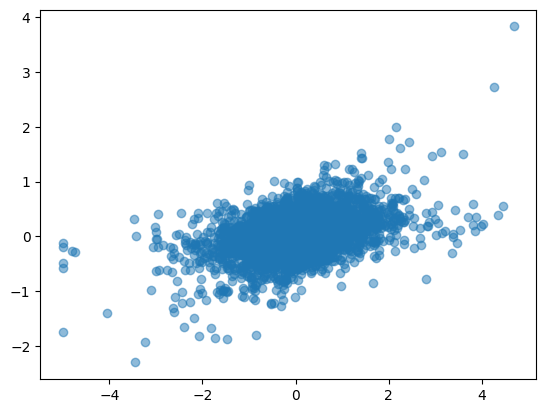

In [ ]:
# plot y_pred vs y_train
plt.scatter(y_train, y_pred, alpha=0.5)

In [ ]:
mse(y_train, y_pred)

np.float64(0.6745376104056711)

In [ ]:
r2(y_train, y_pred)

np.float64(0.172623134299128)

In [ ]:
X_val = val_df[stock_names].values
y_val = val_df['resp'].values
y_val_pred = model.predict(X_val)

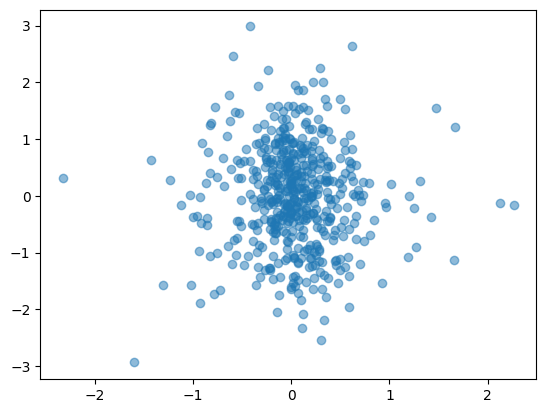

In [ ]:
# plot y_pred vs y_train
plt.scatter(y_val, y_val_pred, alpha=0.5)

In [ ]:
mse(y_val, y_val_pred)

np.float64(1.039650082585547)

In [ ]:
r2(y_val, y_val_pred)

np.float64(-3.9647771018562503)

In [ ]:
# Check the betas
betas = pd.Series(model.coef_, index=stock_names)
print(betas)

AAPL   -0.021483
A      -0.039594
AAL     0.006508
AAT     0.012934
AAWW    0.055212
          ...   
YNDX   -0.012785
Z       0.021749
ZEN    -0.006115
ZIV     0.021329
ZTS    -0.004914
Length: 734, dtype: float64


In [ ]:
# Sort betas by abs val
betas = betas.reindex(betas.abs().sort_values(ascending=False).index)
print(betas)

GOOG     0.303550
GOOGL   -0.296665
SQ       0.119698
NWE     -0.112584
RACE    -0.098135
           ...   
EFF     -0.000324
STAG    -0.000286
CHA     -0.000258
WIX      0.000160
GM       0.000010
Length: 734, dtype: float64


## 5: Regularizing the Regression

In [ ]:
# Run a regularized regression from X_train to y_train
from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=1e4).fit(X_train, y_train)
y_pred = model.predict(X_train)

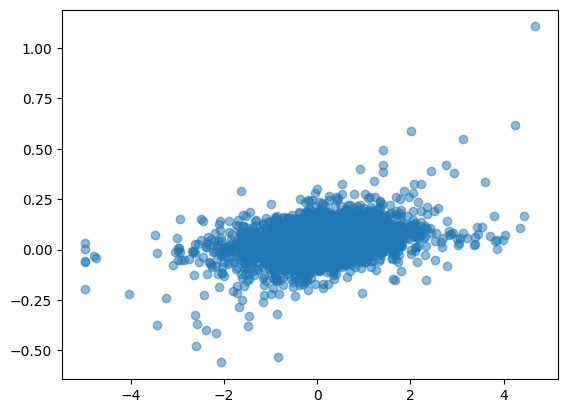

In [ ]:
plt.scatter(y_train, y_pred, alpha=0.5)

In [ ]:
r2(y_train, y_pred)

np.float64(0.052671570033119064)

In [ ]:
# Check the betas
betas = pd.Series(model.coef_, index=stock_names)
betas = betas.reindex(betas.abs().sort_values(ascending=False).index)
print(betas)

TRS     0.012955
ENS     0.011859
NWE    -0.011171
NP     -0.010713
FFIV   -0.010474
          ...   
TMHC    0.000025
MIE    -0.000017
NWS     0.000008
BLDR    0.000006
PKO     0.000002
Length: 734, dtype: float64


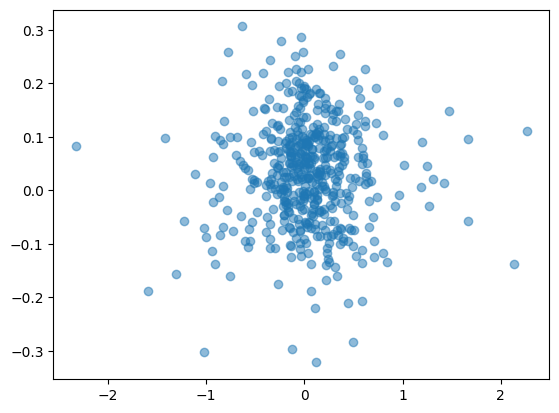

In [ ]:
y_val_pred = model.predict(X_val)
plt.scatter(y_val, y_val_pred, alpha=0.5)

In [ ]:
r2(y_val, y_val_pred)

np.float64(-0.046648132081289484)

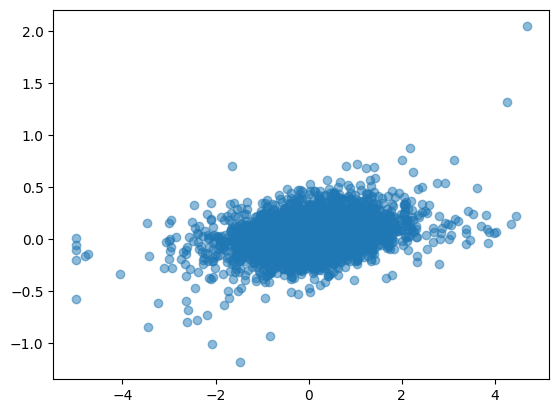

In [ ]:
# Lasso regularization
model = Lasso(alpha=1e-2).fit(X_train, y_train)
y_pred = model.predict(X_train)
plt.scatter(y_train, y_pred, alpha=0.5)

In [ ]:
r2(y_train, y_pred)

np.float64(0.08482199871054996)

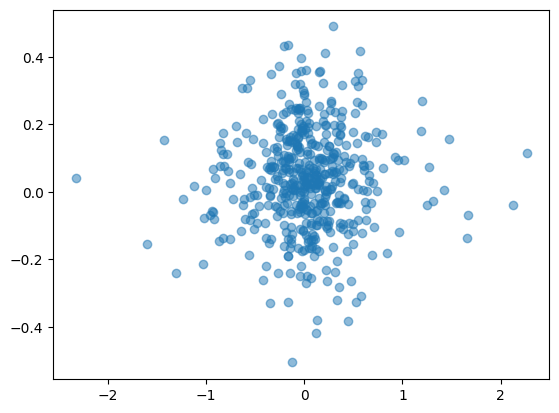

In [ ]:
y_val_pred = model.predict(X_val)
plt.scatter(y_val, y_val_pred, alpha=0.5)

In [ ]:
r2(y_val, y_val_pred)

np.float64(-0.08689498705960719)

## 6: A Rolling Regression

In [ ]:
# Function that regresses on just the past window datapoints
def window_regression(X, y, window_size=5, alpha=1e3):
    # Last window_size rows of X and y
    if len(X) < window_size:
        raise ValueError("Window size must be less than the number of samples")

    X_window = X[-window_size:].copy()
    y_window = y[-window_size:].copy()

    # model = LinearRegression()
    model = Ridge(alpha=alpha)
    model.fit(X_window, y_window)

    return model

In [ ]:
trues = []
preds = []
for i in range(len(X_train) - 1000, len(X_train)):
    model = window_regression(X_train[:i], y_train[:i], window_size=300, alpha=1e3)
    pred = model.predict(X_train[i:i+1])[0]
    trues.append(y_train[i])
    preds.append(pred)

In [ ]:
r2(np.array(trues), np.array(preds))

np.float64(-0.1229205743901749)

In [ ]:
# Function that regresses on past datapoints in a window with exponential decay
def exp_decay_regression(X, y, alpha=1e3, decay_rate=0.01, window_size=300):
    n = len(X)
    if n > window_size:
        X = X[-window_size:]
        y = y[-window_size:]
        n = window_size

    if n == 0:
        raise ValueError("No data to fit")

    # Create weights that decay exponentially
    weights = np.exp(-decay_rate * np.arange(n)[::-1])

    model = Ridge(alpha=alpha)
    model.fit(X, y, sample_weight=weights)

    return model

In [ ]:
trues = []
preds = []
for i in range(len(X_train) - 1000, len(X_train)):
    model = exp_decay_regression(X_train[:i], y_train[:i], decay_rate=0.001, alpha=1e3)
    pred = model.predict(X_train[i:i+1])[0]
    trues.append(y_train[i])
    preds.append(pred)

In [ ]:
r2(np.array(trues), np.array(preds))

np.float64(-0.10871182943152813)

## 7: Feature Engineering

In [ ]:
# Add to each stock column an EWMA version of itself
train_df_ewma = train_df.copy()
val_df_ewma = val_df.copy()
test_df_ewma = test_df.copy()
for stock in stock_names:
    train_df_ewma[f'{stock}_ewma'] = train_df[stock].ewm(alpha=0.01).mean()
    val_df_ewma[f'{stock}_ewma'] = val_df[stock].ewm(alpha=0.01).mean()
    test_df_ewma[f'{stock}_ewma'] = test_df[stock].ewm(alpha=0.01).mean()

/tmp/ipykernel_645052/1212485827.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df_ewma[f'{stock}_ewma'] = train_df[stock].ewm(alpha=0.01).mean()
/tmp/ipykernel_645052/1212485827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_df_ewma[f'{stock}_ewma'] = val_df[stock].ewm(alpha=0.01).mean()
/tmp/ipykernel_645052/1212485827.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

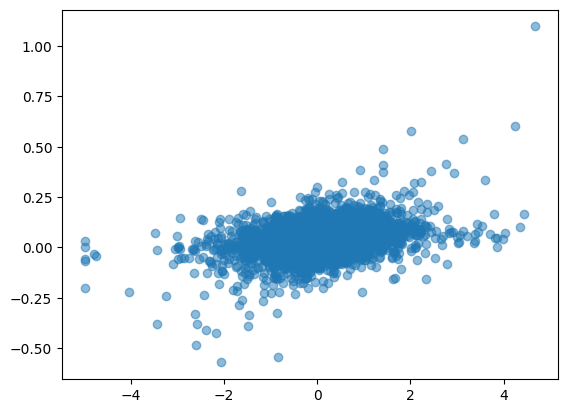

In [ ]:
X_train = train_df_ewma.drop(columns=['resp']).values
y_train = train_df_ewma['resp'].values
model = Ridge(alpha=1e4).fit(X_train, y_train)
y_pred = model.predict(X_train)
plt.scatter(y_train, y_pred, alpha=0.5)

In [ ]:
r2(y_train, y_pred)

np.float64(0.05471618929015454)

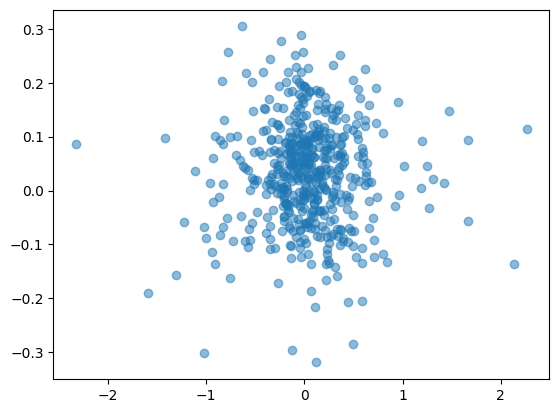

In [ ]:
X_val = val_df_ewma.drop(columns=['resp']).values
y_val = val_df_ewma['resp'].values
y_val_pred = model.predict(X_val)
plt.scatter(y_val, y_val_pred, alpha=0.5)

In [ ]:
r2(y_val, y_val_pred)

np.float64(-0.04177532667303496)

In [ ]:
trues = []
preds = []
for i in range(len(X_train) - 1000, len(X_train)):
    model = exp_decay_regression(X_train[:i], y_train[:i], decay_rate=0.01, alpha=1e4)
    pred = model.predict(X_train[i:i+1])[0]
    trues.append(y_train[i])
    preds.append(pred)

In [ ]:
r2(np.array(trues), np.array(preds))

np.float64(-0.01289157671957164)

## 8: Your Turn!